In [1]:
import pandas as pd
import numpy as np

hotel_bookings = pd.read_csv('hotel_bookings.csv') # read in the csv file

hotel_bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


# Impute Data

In [2]:
import math

hotel_bookings_transform = hotel_bookings
hotel_bookings_transform= hotel_bookings_transform.drop(columns=['agent','company', 'country'])

hotel_bookings_transform['meal']= hotel_bookings_transform['meal'].apply(lambda x: 'SC' if  x == 'Undefined'  else x)
hotel_bookings_transform['children']= hotel_bookings_transform['children'].apply(lambda x: 0 if  math.isnan(x)  else x)
hotel_bookings_transform['market_segment']= hotel_bookings_transform['market_segment'].apply(lambda x: 'Online TA' if  x == 'Undefined'  else x)
hotel_bookings_transform['distribution_channel']= hotel_bookings_transform['distribution_channel'].apply(lambda x: 'TA/TO' if  x == 'Undefined'  else x)


hotel_bookings_transform['hotel']=hotel_bookings_transform['hotel'].astype('category').cat.codes
hotel_bookings_transform['market_segment']=hotel_bookings_transform['market_segment'].astype('category').cat.codes
hotel_bookings_transform['meal']=hotel_bookings_transform['meal'].astype('category').cat.codes
hotel_bookings_transform['reservation_status']=hotel_bookings_transform['reservation_status'].astype('category').cat.codes
hotel_bookings_transform['distribution_channel']=hotel_bookings_transform['distribution_channel'].astype('category').cat.codes
hotel_bookings_transform['reserved_room_type']=hotel_bookings_transform['reserved_room_type'].astype('category').cat.codes
hotel_bookings_transform['assigned_room_type']=hotel_bookings_transform['assigned_room_type'].astype('category').cat.codes
hotel_bookings_transform['deposit_type']=hotel_bookings_transform['deposit_type'].astype('category').cat.codes
hotel_bookings_transform['customer_type']=hotel_bookings_transform['customer_type'].astype('category').cat.codes

assign_month = {"arrival_date_month": {"January": 1, "February": 2, "March": 3, "April": 4,"May": 5,"June": 6,"July": 7,"August": 8,"September": 9,"October": 10,"November": 11,"December": 12}}
hotel_bookings_transform = hotel_bookings_transform.replace(assign_month)

# Convert Date to Ordinal
import datetime as dt
hotel_bookings_transform['reservation_status_date'] = pd.to_datetime(hotel_bookings_transform['reservation_status_date'])
hotel_bookings_transform['reservation_status_date'] = hotel_bookings_transform['reservation_status_date'].map(dt.datetime.toordinal)

In [3]:
# To convert back to Date
# hotel_bookings_transform['reservation_status_date'] = hotel_bookings_transform['reservation_status_date'].map(dt.datetime.fromordinal)
# hotel_bookings_transform['reservation_status_date']

In [4]:
hotel_bookings_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int8   
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [5]:
hotel_bookings_transform.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,2016.156554,6.552483,27.165173,15.798241,0.927599,2.500302,1.856403,...,1.329399,0.221124,0.124893,2.321149,2.137323,101.831122,0.062518,0.571363,0.649803,736175.017221
std,0.472181,0.482918,106.863097,0.707476,3.090619,13.605138,8.780829,0.998613,1.908286,0.579261,...,1.878762,0.652306,0.334678,17.594721,0.577040,50.535790,0.245291,0.792798,0.497776,229.238393
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,735523.000000
25%,0.000000,0.000000,18.000000,2016.000000,4.000000,16.000000,8.000000,0.000000,1.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000,735995.000000
50%,0.000000,0.000000,69.000000,2016.000000,7.000000,28.000000,16.000000,1.000000,2.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,94.575000,0.000000,0.000000,1.000000,736183.000000
75%,1.000000,1.000000,160.000000,2017.000000,9.000000,38.000000,23.000000,2.000000,3.000000,2.000000,...,3.000000,0.000000,0.000000,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000,736368.000000
max,1.000000,1.000000,737.000000,2017.000000,12.000000,53.000000,31.000000,19.000000,50.000000,55.000000,...,11.000000,21.000000,2.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000,736586.000000


In [6]:
hotel_bookings_transform.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,1,0,342,2015,7,27,1,0,0,2,...,2,3,0,0,2,0.0,0,0,1,735780
1,1,0,737,2015,7,27,1,0,0,2,...,2,4,0,0,2,0.0,0,0,1,735780
2,1,0,7,2015,7,27,1,0,1,1,...,2,0,0,0,2,75.0,0,0,1,735781
3,1,0,13,2015,7,27,1,0,1,1,...,0,0,0,0,2,75.0,0,0,1,735781
4,1,0,14,2015,7,27,1,0,2,2,...,0,0,0,0,2,98.0,0,1,1,735782


# Training and Testing Split

In [7]:
from sklearn.model_selection import ShuffleSplit

y = hotel_bookings_transform['is_canceled']
X = hotel_bookings_transform.drop(columns=['is_canceled'])

##### Standarization

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)

X_scl = scaler.transform(X)

##### Split Data for Train and Test

In [9]:
# to use the cross validation object in scikit learn, we need to grab an instance
#    of the object and set it up. This object will be able to split our data into 
#    training and testing splits

cv_object = ShuffleSplit(n_splits=10,
                         test_size  = 0.2, random_state=10)

print(cv_object)

ShuffleSplit(n_splits=10, random_state=10, test_size=0.2, train_size=None)


# Logistic Regression

In [10]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.10, random_state=0)

In [11]:
#Logisitic regression 10-fold cross-validation 
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()


parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [10]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }

#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X, y)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   12.4s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   35.9s
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:   49.3s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.1, train_size=None),
             estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [100, 500], 'penalty': ['l2'],
                         'random_state': [10], 'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [12]:
#Diplay the top model parameters
regGridSearch.best_estimator_

LogisticRegression(C=0.001, class_weight='none', random_state=10)

In [13]:
from sklearn.model_selection import cross_validate

def EvaluateClassifierEstimator(classifierEstimator, X, y, cv):
   
    #Perform cross validation 
    scores = cross_validate(classifierEstimator, X, y, scoring=['accuracy','precision','recall']
                            , cv=cv, return_train_score=True)

    Accavg = scores['test_accuracy'].mean()
    Preavg = scores['test_precision'].mean()
    Recavg = scores['test_recall'].mean()

    print_str = "The average accuracy for all cv folds is: \t\t\t {Accavg:.5}"
    print_str2 = "The average precision for all cv folds is: \t\t\t {Preavg:.5}"
    print_str3 = "The average recall for all cv folds is: \t\t\t {Recavg:.5}"

    print(print_str.format(Accavg=Accavg))
    print(print_str2.format(Preavg=Preavg))
    print(print_str3.format(Recavg=Recavg))
    print('*********************************************************')

    print('Cross Validation Fold Mean Error Scores')
    scoresResults = pd.DataFrame()
    scoresResults['Accuracy'] = scores['test_accuracy']
    scoresResults['Precision'] = scores['test_precision']
    scoresResults['Recall'] = scores['test_recall']

    return scoresResults

def EvaluateClassifierEstimator2(classifierEstimator, X, y, cv):
    
    #Perform cross validation 
    from sklearn.model_selection import cross_val_predict
    predictions = cross_val_predict(classifierEstimator, X, y, cv=cv)
    
    #model evaluation 
    from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
    
    #pass true test set values and predictions to classification_report
    classReport = classification_report(y,predictions)
    confMat = confusion_matrix(y,predictions)
    acc = accuracy_score(y,predictions)
    
    print(classReport)
    print(confMat)
    print(acc)

In [14]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X, y, cv)

The average accuracy for all cv folds is: 			 0.66166
The average precision for all cv folds is: 			 0.59184
The average recall for all cv folds is: 			 0.27985
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.662367,0.609699,0.287970
1,0.665382,0.588263,0.286662
2,0.664796,0.583254,0.280230
3,0.666052,0.598748,0.282693
4,0.666723,0.594142,0.291515
5,0.656671,0.585914,0.264011
6,0.654494,0.590218,0.275916
7,0.656420,0.594036,0.274872
8,0.663791,0.581643,0.276654
9,0.659938,0.592522,0.278003


In [15]:
EvaluateClassifierEstimator2(classifierEst, X, y, 10)

              precision    recall  f1-score   support

           0       0.67      0.87      0.76     75166
           1       0.55      0.28      0.37     44224

    accuracy                           0.65    119390
   macro avg       0.61      0.57      0.56    119390
weighted avg       0.63      0.65      0.61    119390

[[65307  9859]
 [32044 12180]]
0.6490242063824441


### After Standarization

In [16]:
#Logisitic regression 10-fold cross-validation 
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()

cv = ShuffleSplit(n_splits=10, test_size=0.20, random_state=0)

parameters = { 'penalty':['l2']
              ,'C': [1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [10]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }


#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch_std = GridSearchCV(estimator=regEstimator
                   , n_jobs=1 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch_std.fit(X_scl, y)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [1, 10, 100, 1000],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [100, 500], 'penalty': ['l2'],
                         'random_state': [10], 'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [17]:
#Diplay the top model parameters
regGridSearch_std.best_estimator_

LogisticRegression(C=1000, class_weight='balanced', max_iter=500,
                   random_state=10)

In [18]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch_std.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X_scl, y, cv)

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The average accuracy for all cv folds is: 			 0.99349
The average precision for all cv folds is: 			 0.9985
The average recall for all cv folds is: 			 0.98386
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.993090,0.998750,0.982782
1,0.993927,0.998137,0.985172
2,0.992629,0.998722,0.981171
3,0.993383,0.997803,0.984145
4,0.993383,0.998729,0.983273
5,0.993718,0.998390,0.984572
6,0.993844,0.998624,0.984730
7,0.992462,0.998285,0.981450
8,0.994346,0.998618,0.986015
9,0.994137,0.998973,0.985259


In [19]:
EvaluateClassifierEstimator2(classifierEst, X_scl, y, 10)

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     75166
           1       1.00      0.98      0.99     44224

    accuracy                           0.99    119390
   macro avg       0.99      0.99      0.99    119390
weighted avg       0.99      0.99      0.99    119390

[[75021   145]
 [  833 43391]]
0.9918083591590585


# Feature Importance for the Top Performing Model

In [20]:
#Create a classification estimator with best parameters for cross validation
classifierEst = regGridSearch.best_estimator_

#Fit the model using all of the scaled training data
classifierEst.fit(X, y)

from sklearn.metrics import confusion_matrix

In [21]:
#Load the model's coefficient weights and feature names into a dataframe sorted by weights
weights = classifierEst.coef_.ravel()
feature_names = X.columns.values
linreg_ft_imp_df = pd.DataFrame({'feature_names':feature_names, 'weights':weights, 'absolute_weights': np.abs(weights)})
linreg_ft_imp_df.sort_values(by='absolute_weights', inplace=True, ascending=False )

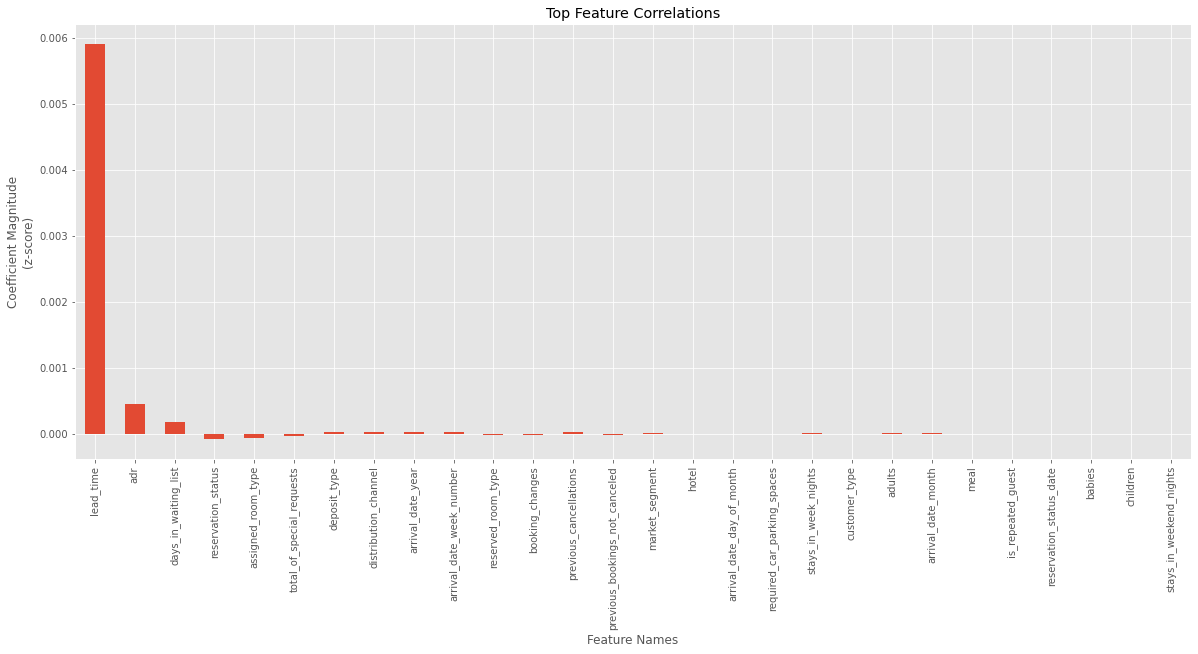

In [22]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

#Plot the model's feature importances
# REFERENCE:  Eric Larson, https://github.com/eclarson/DataMiningNotebooks
plt.style.use('ggplot')

wt_plt_df = linreg_ft_imp_df.head(75)

weights = pd.Series(wt_plt_df['weights'].values,index=wt_plt_df['feature_names'])
ax = weights.plot(kind='bar', figsize=(20,8))

ax.set_title("Top Feature Correlations")
ax.set_ylabel("Coefficient Magnitude\n(z-score)")
ax.set_xlabel("Feature Names")
plt.show()

In [23]:
from sklearn.feature_selection import RFECV

#Create a regression estimator with best parameters for cross validation
classifierEst = regGridSearch.best_estimator_

rfecv = RFECV(estimator=classifierEst, step=1, cv=cv, scoring='accuracy')
rfecv.fit(X, y)

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFECV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
      estimator=LogisticRegression(C=0.001, class_weight='none',
                                   random_state=10),
      scoring='accuracy')

Optimal number of features : 1


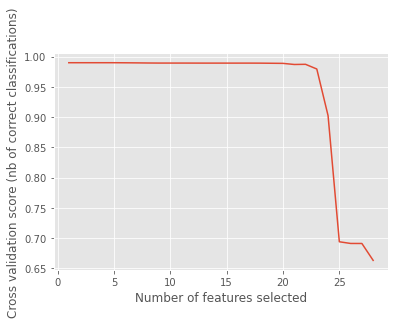

In [24]:
# Examine categorical variables of interest  
import matplotlib.pyplot as plt
%matplotlib inline

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [25]:
#Plot the RFE Rankings
plt.style.use('ggplot')

rfe_ft_imp_df = pd.DataFrame({'feature_names':X.columns, 'weights':rfecv.grid_scores_})
rfe_ft_imp_df.sort_values(by='weights', inplace=True, ascending=False )

top50features = rfe_ft_imp_df.head(50)

top50features

,feature_names,weights
0,hotel,0.989773
2,arrival_date_year,0.989773
3,arrival_date_month,0.989773
4,arrival_date_week_number,0.989773
1,lead_time,0.989773
5,arrival_date_day_of_month,0.989656
6,stays_in_weekend_nights,0.989509
7,stays_in_week_nights,0.989304
8,adults,0.989191
9,children,0.989187


## After Feature Selection

##### With Feature and Without Standarization

In [32]:
X_sel = hotel_bookings_transform[['hotel'
,'lead_time'
,'arrival_date_year'
,'arrival_date_month'
,'arrival_date_week_number'
,'arrival_date_day_of_month'
,'stays_in_weekend_nights'
,'stays_in_week_nights'
,'adults'
,'children'
,'babies'
,'previous_cancellations'
,'previous_bookings_not_canceled'
,'meal'
,'is_repeated_guest'
,'distribution_channel'
,'market_segment'
,'reserved_room_type'
,'assigned_room_type'
,'booking_changes'
,'days_in_waiting_list'
,'customer_type'
,'adr']]

In [33]:
#Logisitic regression 10-fold cross-validation 
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()


parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [10]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }


#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_sel, y)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:   37.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:  3.1min
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:  4.6min finished
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [100, 500], 'penalty': ['l2'],
                         'random_state': [10], 'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [34]:
#Diplay the top model parameters
regGridSearch.best_estimator_

LogisticRegression(C=0.1, class_weight='none', max_iter=500, random_state=10)

In [35]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X_sel, y, cv)

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

The average accuracy for all cv folds is: 			 0.71472
The average precision for all cv folds is: 			 0.6702
The average recall for all cv folds is: 			 0.44825
*********************************************************
Cross Validation Fold Mean Error Scores


C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Accuracy,Precision,Recall
0,0.715303,0.682235,0.449128
1,0.717648,0.664262,0.455057
2,0.714884,0.663653,0.452356
3,0.712916,0.662309,0.444964
4,0.718276,0.671436,0.459263
5,0.716894,0.677247,0.445377
6,0.714842,0.675293,0.442710
7,0.709817,0.666554,0.442271
8,0.716266,0.669748,0.453098
9,0.710319,0.669244,0.438281


In [36]:
EvaluateClassifierEstimator2(classifierEst, X_sel, y, 10)

C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Chris\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

              precision    recall  f1-score   support

           0       0.69      0.82      0.75     75166
           1       0.54      0.37      0.44     44224

    accuracy                           0.65    119390
   macro avg       0.61      0.59      0.59    119390
weighted avg       0.63      0.65      0.63    119390

[[61287 13879]
 [27870 16354]]
0.6503140966580115


##### With Feature Selection and With Standarization

In [26]:
X_sel = hotel_bookings_transform[['hotel'
,'lead_time'
,'arrival_date_year'
,'arrival_date_month'
,'arrival_date_week_number'
,'arrival_date_day_of_month'
,'stays_in_weekend_nights'
,'stays_in_week_nights'
,'adults'
,'children'
,'babies'
,'previous_cancellations'
,'previous_bookings_not_canceled'
,'meal'
,'is_repeated_guest'
,'distribution_channel'
,'market_segment'
,'reserved_room_type'
,'assigned_room_type'
,'booking_changes'
,'days_in_waiting_list'
,'customer_type'
,'adr']]

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_sel)

X_sel_scl = scaler.transform(X_sel)

In [28]:
#Logisitic regression 10-fold cross-validation 
from sklearn.linear_model import LogisticRegression
regEstimator = LogisticRegression()


parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [10]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }


#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_sel_scl, y)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    6.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   36.4s
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:   59.2s finished


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=0, test_size=0.2, train_size=None),
             estimator=LogisticRegression(), n_jobs=8,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'class_weight': ['balanced', 'none'],
                         'max_iter': [100, 500], 'penalty': ['l2'],
                         'random_state': [10], 'solver': ['lbfgs']},
             scoring='accuracy', verbose=1)

In [29]:
#Diplay the top model parameters
regGridSearch.best_estimator_

LogisticRegression(C=1, class_weight='none', random_state=10)

In [30]:
#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X_sel_scl, y, cv)

The average accuracy for all cv folds is: 			 0.72275
The average precision for all cv folds is: 			 0.7103
The average recall for all cv folds is: 			 0.42115
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.722506,0.717367,0.427661
1,0.722674,0.697679,0.421494
2,0.724139,0.707396,0.423485
3,0.722841,0.705489,0.420782
4,0.726903,0.711988,0.433204
5,0.723427,0.715960,0.415769
6,0.723051,0.714892,0.419183
7,0.719323,0.708341,0.419112
8,0.722632,0.709007,0.418874
9,0.719993,0.714899,0.411950


In [31]:
EvaluateClassifierEstimator2(classifierEst, X_sel_scl, y, 10)

              precision    recall  f1-score   support

           0       0.66      0.76      0.70     75166
           1       0.45      0.33      0.38     44224

    accuracy                           0.60    119390
   macro avg       0.55      0.55      0.54    119390
weighted avg       0.58      0.60      0.59    119390

[[56972 18194]
 [29499 14725]]
0.6005276823854594


##### With Feature Selection, Standarization, and Clean up Outliers

In [45]:
hotel_clr_outliers = hotel_bookings_transform[['hotel'
,'lead_time'
,'arrival_date_year'
,'arrival_date_month'
,'arrival_date_week_number'
,'arrival_date_day_of_month'
,'stays_in_weekend_nights'
,'stays_in_week_nights'
,'adults'
,'children'
,'babies'
,'previous_cancellations'
,'previous_bookings_not_canceled'
,'meal'
,'is_repeated_guest'
,'distribution_channel'
,'market_segment'
,'reserved_room_type'
,'assigned_room_type'
,'booking_changes'
,'days_in_waiting_list'
,'customer_type'
,'adr'
,'is_canceled']]

X_clr_out = hotel_clr_outliers[
    (np.abs(stats.zscore(hotel_clr_outliers[['hotel']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['lead_time']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['arrival_date_year']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['arrival_date_month']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['arrival_date_week_number']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['arrival_date_day_of_month']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['stays_in_weekend_nights']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['stays_in_week_nights']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['adults']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['adr']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['children']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['babies']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['previous_cancellations']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['previous_bookings_not_canceled']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['is_repeated_guest']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['distribution_channel']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['market_segment']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['reserved_room_type']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['assigned_room_type']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['booking_changes']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['days_in_waiting_list']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['customer_type']])) <= 3).all(axis=1) &
    (np.abs(stats.zscore(hotel_clr_outliers[['adr']])) <= 3).all(axis=1)]

In [46]:
X_clr_out.shape

(98315, 24)

In [47]:
X_sel.shape

(119390, 23)

In [48]:
y_clr_out = X_clr_out['is_canceled']
y_clr_out.shape

(98315,)

In [49]:
X_clr_out.drop(['is_canceled'], axis=1, inplace=True)
X_clr_out.shape

C:\Users\Chris\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


(98315, 23)

In [50]:
X_clr_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98315 entries, 2 to 119389
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   hotel                           98315 non-null  int8   
 1   lead_time                       98315 non-null  int64  
 2   arrival_date_year               98315 non-null  int64  
 3   arrival_date_month              98315 non-null  int64  
 4   arrival_date_week_number        98315 non-null  int64  
 5   arrival_date_day_of_month       98315 non-null  int64  
 6   stays_in_weekend_nights         98315 non-null  int64  
 7   stays_in_week_nights            98315 non-null  int64  
 8   adults                          98315 non-null  int64  
 9   children                        98315 non-null  float64
 10  babies                          98315 non-null  int64  
 11  previous_cancellations          98315 non-null  int64  
 12  previous_bookings_not_canceled 

In [53]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_clr_out)

X_clr_out_scl = scaler.transform(X_clr_out)

In [54]:
#Logisitic regression 10-fold cross-validation 
from sklearn.linear_model import LogisticRegression

regEstimator = LogisticRegression()


parameters = { 'penalty':['l2']
              ,'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
              ,'class_weight': ['balanced', 'none']
              ,'random_state': [10]
              ,'solver': ['lbfgs']
              ,'max_iter':[100,500]
             }


#Create a grid search object using the  
from sklearn.model_selection import GridSearchCV
regGridSearch = GridSearchCV(estimator=regEstimator
                   , n_jobs=8 # jobs to run in parallel
                   , verbose=1 # low verbosity
                   , param_grid=parameters
                   , cv=cv # KFolds = 10
                   , scoring='accuracy')

#Perform hyperparameter search to find the best combination of parameters for our data
regGridSearch.fit(X_clr_out_scl, y_clr_out)

#Use the best parameters for our Linear Regression object
classifierEst = regGridSearch.best_estimator_

#Evaluate the regression estimator above using our pre-defined cross validation and scoring metrics. 
EvaluateClassifierEstimator(classifierEst, X_clr_out_scl, y_clr_out, cv)

Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    3.5s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:   26.1s
[Parallel(n_jobs=8)]: Done 280 out of 280 | elapsed:   43.2s finished


The average accuracy for all cv folds is: 			 0.7333
The average precision for all cv folds is: 			 0.73394
The average recall for all cv folds is: 			 0.45972
*********************************************************
Cross Validation Fold Mean Error Scores


,Accuracy,Precision,Recall
0,0.737629,0.731614,0.468085
1,0.735951,0.750274,0.457514
2,0.728882,0.736330,0.453179
3,0.730001,0.721406,0.458446
4,0.731526,0.731687,0.460899
5,0.728933,0.723916,0.454693
6,0.738036,0.740933,0.464852
7,0.738138,0.731817,0.466621
8,0.732238,0.734348,0.455195
9,0.731628,0.737080,0.457682


In [58]:
regGridSearch.best_index_

14

In [59]:
regGridSearch.best_params_

{'C': 1,
 'class_weight': 'none',
 'max_iter': 100,
 'penalty': 'l2',
 'random_state': 10,
 'solver': 'lbfgs'}

In [60]:
regGridSearch.best_score_

0.7332960382444184

In [67]:
regGridSearch.best_estimator_.intercept_

array([-0.51123253])

In [65]:
regGridSearch.best_estimator_.coef_

array([[-0.02451123,  0.5054462 ,  0.00463696,  1.36078607, -1.44887531,
         0.12551905, -0.03390311, -0.01909664, -0.03425016, -0.02592131,
         0.        ,  1.22992503, -0.36556295, -0.03739403,  0.        ,
         0.46385672, -0.37462837,  0.73685766, -1.00779384, -0.31290101,
         0.08846037, -0.53053458,  0.18481342]])